
Content:The dataset is related to  white variants of the Portuguese "Vinho Verde" wine.. Due to privacy 
and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available
e.g. there is no data about grape types, wine brand, wine selling price, etc.).

Objective :To determine which physiochemical properties make a wine 'good'. 
    
Data set Desciption:The quality of a wine is determined by 11 input variables:

1.Fixed acidity:are non-volatile acids that don not evaporate easily

2.Volatile acidity:acetic acid content which leading to an unpleasant vinegar taste

3.Citric acid:acts as a preservative to increase acidity(samll quantities add freshness and flavour to wines)

4.Residual sugar:is the amount of sugar remaining after fermentation stops.

5.Chlorides :the amount of salt present

6.Free sulfur dioxide:it prevents microbial growth and the oxidation of wine.

7.Total sulfur dioxide:is the amount of so2

8.Density:sweeter wines have higher density

9.pH :the level of acidity

10.Sulfates:a wine acts as a preservative that contributes to s02 levels and acts as an antimicrobial and antioxidant.

11.Alcohol:the amount of alcohol present in wine.

Target Variable:Quality 

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_csv('winequality_red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape #checking data dimension,there are 1599 rows and 12 columns

(1599, 12)

In [4]:
df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


 it shows the first five rows of the dataset.The data looks very clean but
we need to see if theres any missing value or not

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


key observation:
1.The mean is more than median(50th percentile)in all columns.This means the distribution is positively skewed.

2.There is a huge difference in 75th percentile and max in residual sugar,free sugar dioxide,total sulphur dioxide.

3.The 1 and 2 observation suggest that there are extreme outliers present in these three columns in residual sugar,free sulphur dioxide,,Total Sulphur dioxide while others have less outliers.

In [8]:
df.quality.unique() 

array([5, 6, 7, 4, 8, 3], dtype=int64)

observation:
Target/dependent variable is discrete and categorical in nature.

quality score scale range from 3 to 8;where 3 is low quality and 8 is best.

The scores obtained are between 3 to 8

In [9]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

observation:
Quality has most values concentrated in the categories of 5,6,7.

few observation are present in the categories in 3 and 8

In [10]:
#checking the null value in the dataset
df.isnull().sum() #no missing value present

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# DATA VISUALIZATION

<AxesSubplot:>

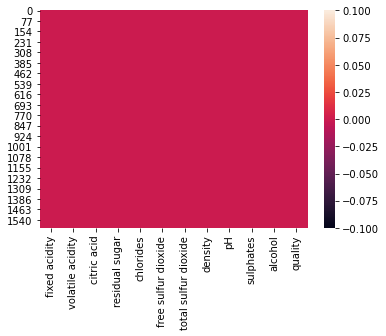

In [11]:
sns.heatmap(df.isnull()) 

from the graph too we can see no missing value present

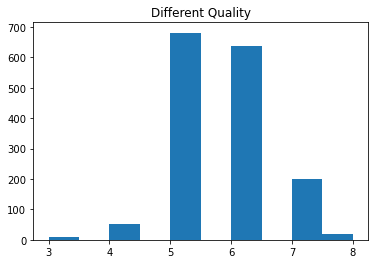

In [12]:
#checking imbalance in dataset 
df["quality"].hist(grid=False)
plt.title("Different Quality")
plt.show()

In [13]:
#the dataset shows there is imbalance in quality target variable which is addressed later.

In [14]:
#splitting the quality variable
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]#quality
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

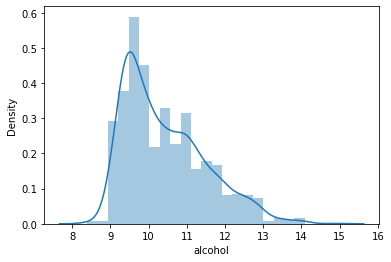

In [15]:
sns.distplot(df['alcohol']) #not normally distributed.skewed data.

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

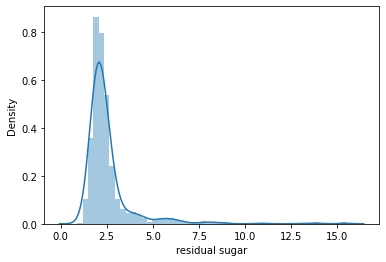

In [16]:
sns.distplot(df['residual sugar']) #high peak is there means outliers are there.Not normally distributed.

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

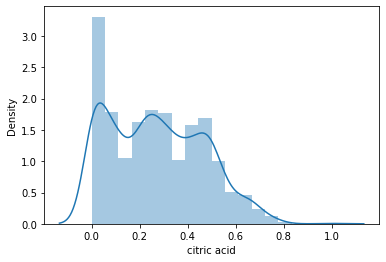

In [17]:
sns.distplot(df['citric acid']) #not normally distributed

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

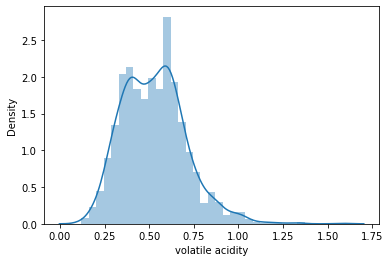

In [18]:
sns.distplot(df['volatile acidity']) #not normally distributed

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

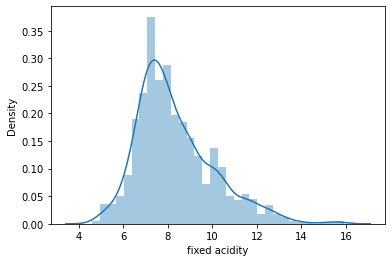

In [19]:
sns.distplot(df['fixed acidity']) #the distribution of data is not normal distributed..skewness is there

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

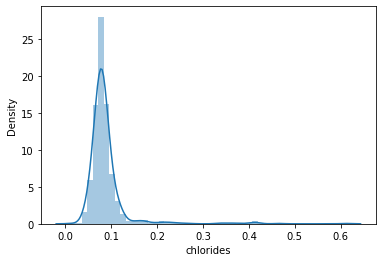

In [20]:
sns.distplot(df['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

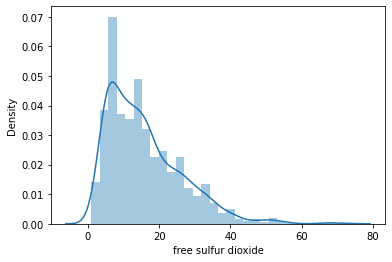

In [21]:
sns.distplot(df['free sulfur dioxide']) #skewness is there #not normally distributed.

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

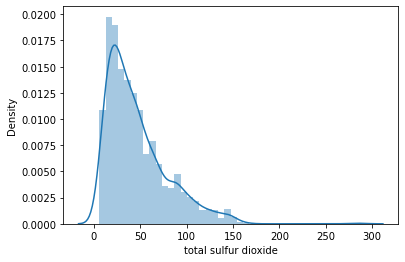

In [22]:
sns.distplot(df['total sulfur dioxide'])# skewness is there #the curve is not normally distributed

<AxesSubplot:xlabel='density', ylabel='Density'>

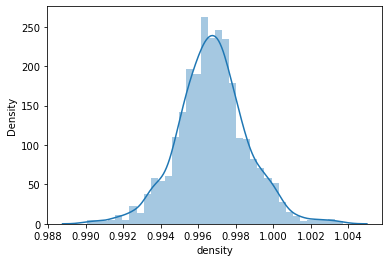

In [23]:
sns.distplot(df['density']) #its is normaly distributed.

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

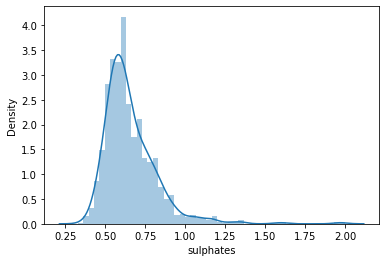

In [24]:
sns.distplot(df['sulphates']) #not normally distributed

<AxesSubplot:xlabel='quality', ylabel='Density'>

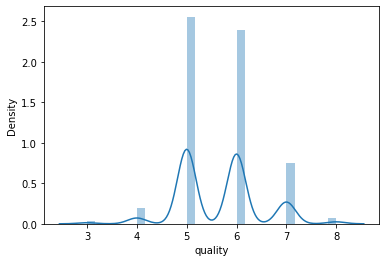

In [25]:
sns.distplot(df['quality']) #bimodal distribution, we will be considering only one mode. 

In [26]:
#checking correlation #it has been addressed visually later.
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


we see that some variables are strongly correlated with quality like alcohol,sulphates,citric acid 
which means that these are most important features in our model

<AxesSubplot:>

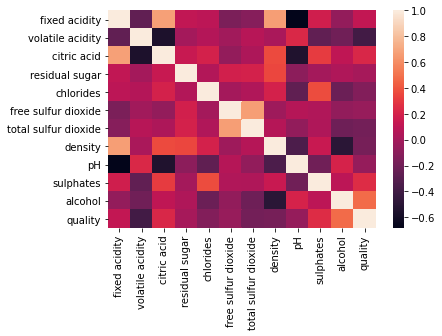

In [27]:
sns.heatmap(df.corr())

<AxesSubplot:>

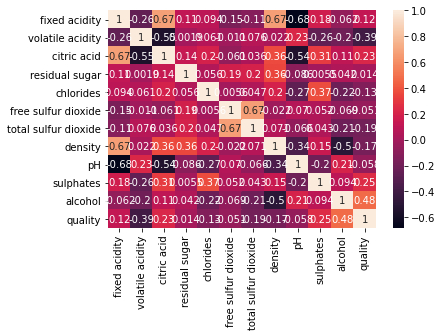

In [28]:
corr = df.corr()
sns.heatmap(corr,annot=True) 

In [29]:
corr_matrix=df.corr()  #correlated values of independent variable with the target varibale in sorted form
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Some variables are strongly correlated to quality e.g alcohol in top .

Some are weakly correlated with alcohol e.g volatile acidity (most),chlorides,free SO2,Total SO2,density,PH are negatively corelated.

We can remove volatile acidity as it is most negatively correlated relative to other

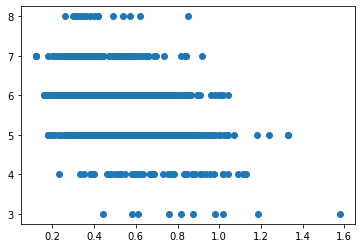

In [30]:
plt.scatter(df['volatile acidity'],df['quality']) 
plt.show()

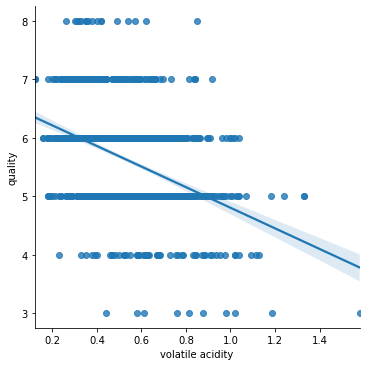

In [31]:
sns.lmplot(x="volatile acidity",y="quality",data=df) #nvolatile acid and quality are negatively corelated

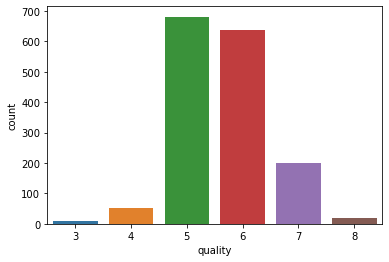

In [32]:
sns.countplot(df['quality']) #showing quality 5,6,7 are most dominant and good.
plt.show()

Lets see the data distribution among all the columns

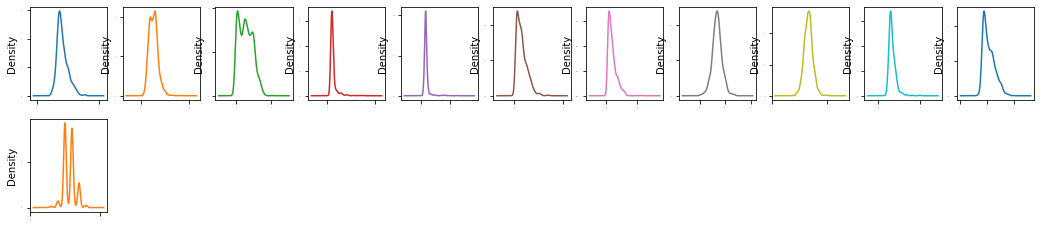

In [33]:
df.plot(kind="density",subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

Thus we can see that skewness is present in multiple column,we will handle skewness in further step.

we can aslo check via histogram plot too

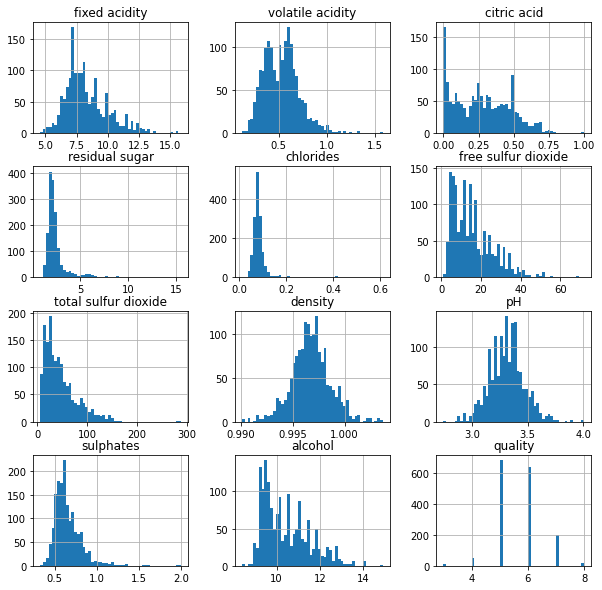

In [34]:
df.hist(figsize=(10,10),bins=50)
plt.show()

In [35]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

we can see most of the  features having skewness like residual sugar,chlorides,
Totals02,free so2,sulphates having the most . The normal range is +/- 5.so we need to apply it by power transform method 

fixed acidity               AxesSubplot(0.125,0.71587;0.168478x0.16413)
volatile acidity         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
citric acid              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
residual sugar           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chlorides                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
free sulfur dioxide     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
total sulfur dioxide    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
density                 AxesSubplot(0.731522,0.518913;0.168478x0.16413)
pH                         AxesSubplot(0.125,0.321957;0.168478x0.16413)
sulphates               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
alcohol                 AxesSubplot(0.529348,0.321957;0.168478x0.16413)
quality                 AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

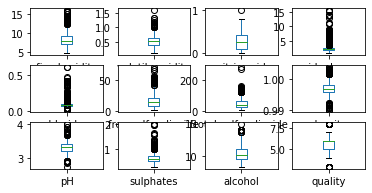

In [36]:
#check outliers #this is not dat visible
df.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

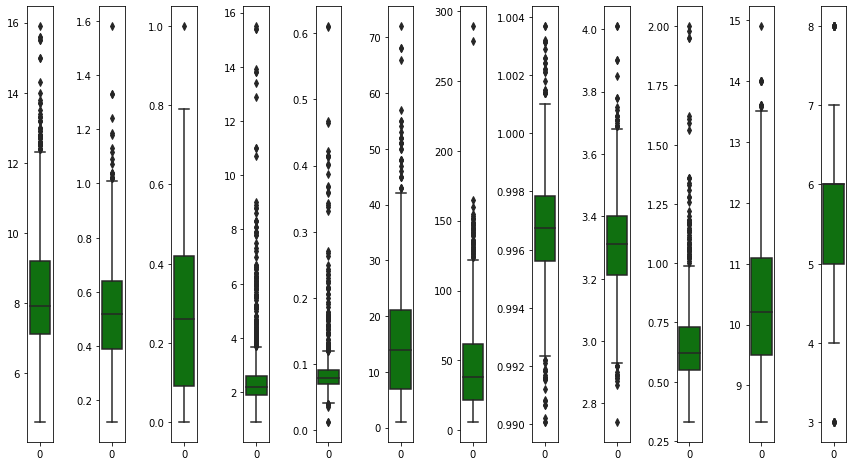

In [37]:
#checking outliers
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [38]:
# almost most of the features are having outliers so we need to clean it.

In [39]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [40]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [41]:
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [42]:
df.shape

(1599, 12)

In [43]:
df_new.shape # checing from above data loss is aroung 9% 

(1451, 12)

Now we will set an arbitrary cutoff for dependent variable (wine quality) at e.g. 7 or 
higher getting classified as 'good/1'and the remainder as 'not good/0' 

In [44]:
df_new['good']=[1 if x>=7 else 0 for x in df_new['quality']]
X=df_new.drop(['quality','good'],axis=1)
y=df_new['good']

In [45]:
#see proportin of good vs not good wines
df_new['good'].value_counts() #thus we see 217 wines are labeled as good and 1250 wines are not good.

0    1250
1     201
Name: good, dtype: int64

Thus we see that we have an imbalanced dataset in which only 13.85% of the data is classified as "good" or 1.
This means that even when our classification model outputs bad or "0" all the time, 
we will still get 86% accuracy which is still good accuracy rate. 

In [46]:
import sklearn
sklearn.__version__

'1.0.2'

In [47]:
import numpy
numpy.__version__

'1.20.1'

In [48]:
!pip install --user imblearn

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
#Addressing Imbalance using SMOTE TECHNIQUE
sm=SMOTE()
X1,y1=sm.fit_resample(X,y)
y1

0       0
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    1
2499    1
Name: good, Length: 2500, dtype: int64

In [51]:
y1.value_counts() #validating 

0    1250
1    1250
Name: good, dtype: int64

<AxesSubplot:xlabel='good', ylabel='count'>

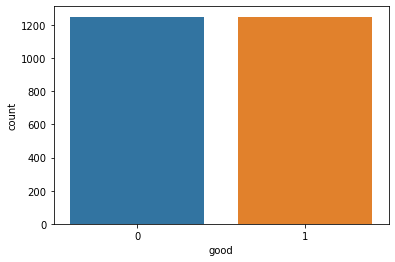

In [52]:
sns.countplot(y1) #now its balanced

In [53]:
from sklearn.preprocessing import StandardScaler
X_features=X1
X1=StandardScaler().fit_transform(X1)

In [54]:
#removing skewness
from sklearn.preprocessing import power_transform
X1=power_transform(X1,method='yeo-johnson')

In [55]:
#splitting the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,y1,test_size=.25,random_state=0)

# Base model :Logistic Regression

In [56]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [57]:
pred=lg.predict(x_test)
print(pred)

[0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0
 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0
 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0
 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1
 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 1 1 1 0 1 1 1 0 1 0 1 1 

In [58]:
print("accuracy_score:",accuracy_score(pred,y_test))

accuracy_score: 0.8368


In [59]:
print(confusion_matrix(y_test,pred))

[[243  64]
 [ 38 280]]


# AUC ROC CURVE 

Area under the curve-Receiver operating charateristic :grapical reprenstation of accuracy score

In [60]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [61]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [ ]:
y_pred_prob

In [63]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
thresholds

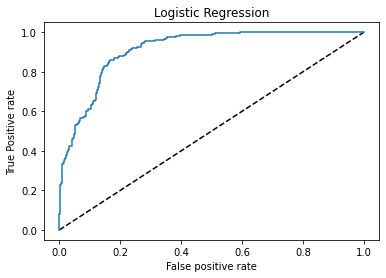

In [67]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('Logistic Regression')
plt.show()

In [68]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [69]:
print(auc_score)

0.8360170446397477


In [70]:
#Modelling
#Model 1-Decision Tree

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1=DecisionTreeClassifier(random_state=1)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       307
           1       0.89      0.90      0.90       318

    accuracy                           0.89       625
   macro avg       0.89      0.89      0.89       625
weighted avg       0.89      0.89      0.89       625



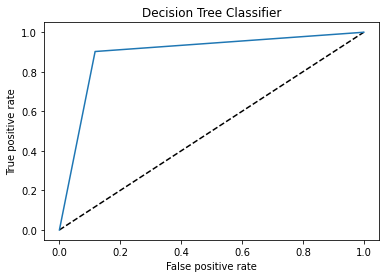

In [71]:
#Decision Tree Curve
y_pred_prob=model1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()


In [72]:
auc_score=roc_auc_score(y_test,model1.predict(x_test))
print(auc_score)

0.8926259398111158


In [73]:
#Modelling
#Model 2-Random Forest

from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier(random_state=1)
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       307
           1       0.93      0.97      0.95       318

    accuracy                           0.95       625
   macro avg       0.95      0.95      0.95       625
weighted avg       0.95      0.95      0.95       625



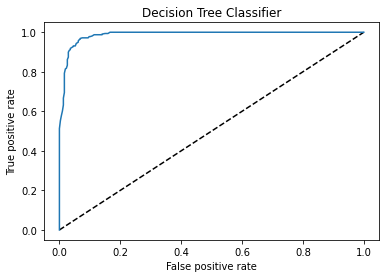

In [74]:
#Random Forest curve
y_pred_prob=model2.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

In [75]:
auc_score=roc_auc_score(y_test,model2.predict(x_test))
print(auc_score)

0.9451324442259235


In [76]:
#Modelling
#Model 3-Ada Boost

from sklearn.ensemble import AdaBoostClassifier

model3=AdaBoostClassifier(random_state=1)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87       307
           1       0.84      0.92      0.88       318

    accuracy                           0.88       625
   macro avg       0.88      0.87      0.87       625
weighted avg       0.88      0.88      0.87       625



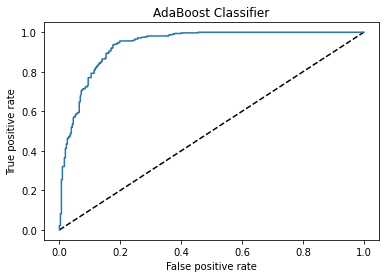

In [77]:
#AdaBoost curve
y_pred_prob=model3.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoost Classifier')
plt.show()

In [78]:
auc_score=roc_auc_score(y_test,model3.predict(x_test))
print(auc_score)

0.8743162682072398


In [79]:
#Modelling
#Model 4-Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

model4=GradientBoostingClassifier(random_state=1)
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       307
           1       0.89      0.95      0.92       318

    accuracy                           0.92       625
   macro avg       0.92      0.91      0.91       625
weighted avg       0.92      0.92      0.92       625



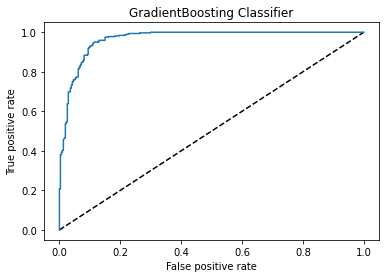

In [80]:
#GradientBoosting curve
y_pred_prob=model4.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoosting classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoosting Classifier')
plt.show()

In [81]:
#Modelling
#Model 5-SVM
from sklearn.svm import SVC
model5=SVC(random_state=1)
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       307
           1       0.87      0.96      0.91       318

    accuracy                           0.91       625
   macro avg       0.91      0.91      0.91       625
weighted avg       0.91      0.91      0.91       625



By comparing the five model,the random forest seems to yield highest level of accuracy that is 94% and also having better f1-score for predicting good quality wines(1)..so the Random Forest model suits best.

# HYPERTUNING THROUGH GRIDSEACRHCV ON RANDOM FOREST MODEL

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [83]:
CV_rfc = GridSearchCV(estimator=model2, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [84]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [95]:
rfc1=RandomForestClassifier(random_state=1, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')

In [96]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=1)

In [97]:
predrfc=rfc1.predict(x_test)

In [98]:
print("Accuracy of Random Forest via Hypertuning: ",accuracy_score(y_test,predrfc))

Accuracy of Random Forest via Hypertuning:  0.9232


Thus ,we see that accurcay score has not improved but still not bad,it may hv remove biasness ,so we will consider this our best model.

<AxesSubplot:>

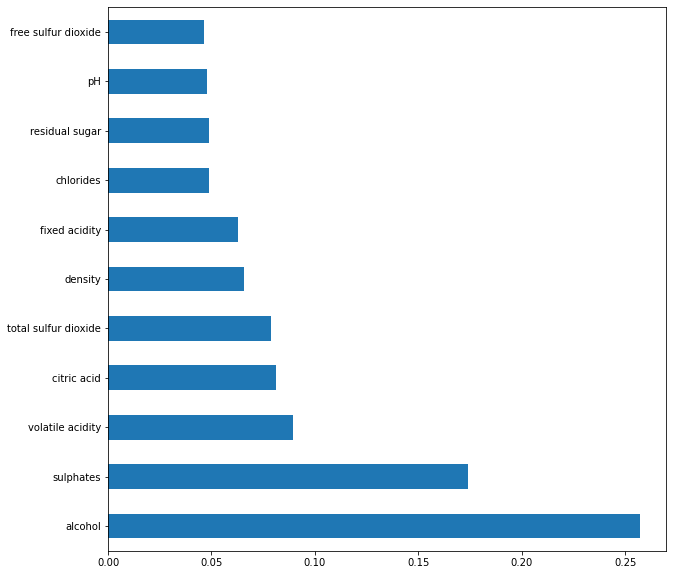

In [99]:
#Feature Selection via Random Forest
#model2=RandomForestClassifier(random_state=1)
#model2.fit(x_train,y_train)
#y_pred2=model2.predict(x_test)
rfc1.fit(x_train, y_train)
predrfc=rfc1.predict(x_test)
feature_imp=pd.Series(model2.feature_importances_,index=X_features.columns)
feature_imp.nlargest(25).plot(kind='barh',figsize=(10,10))

In [106]:
#Comparing the top 4 features i.e alcohol,sulphates,volatile acidity,citric acid shows important feature for good wine selection
#filtering df_new for good quality
df_feat=df_new[df_new['good']==1]
df_feat.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.0
mean,8.826368,0.410423,0.373731,2.638806,0.075567,13.099502,31.064677,0.996056,3.288109,0.743035,11.518491,7.079602,1.0
std,1.808632,0.145665,0.192116,1.211687,0.020333,9.155875,20.723195,0.001977,0.142672,0.121829,0.940970,0.271352,0.0
min,5.100000,0.120000,0.000000,1.200000,0.038000,3.000000,7.000000,0.991570,2.880000,0.470000,9.500000,7.000000,1.0
25%,7.400000,0.310000,0.310000,1.900000,0.063000,6.000000,16.000000,0.994730,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.800000,0.370000,0.400000,2.300000,0.073000,10.000000,25.000000,0.995720,3.280000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.500000,0.490000,2.700000,0.085000,17.000000,42.000000,0.997320,3.370000,0.820000,12.200000,7.000000,1.0
max,13.300000,0.915000,0.760000,6.700000,0.216000,45.000000,106.000000,1.002200,3.710000,1.130000,13.600000,8.000000,1.0


In [107]:
#filtering df_new for only bad quality
df_new1 = df_new.rename(columns= {'good': 'Not good'})
df_feat2=df_new[df_new1['Not good']==0]
df_feat2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.0
mean,8.227040,0.541044,0.247960,2.346840,0.082367,15.427200,45.772800,0.996815,3.320408,0.626432,10.244627,5.431200,0.0
std,1.604204,0.164956,0.184985,0.784768,0.020921,9.297583,30.125112,0.001647,0.140384,0.123685,0.919154,0.566324,0.0
min,5.000000,0.160000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000,0.0
25%,7.100000,0.420000,0.080000,1.900000,0.071000,8.000000,23.000000,0.995773,3.220000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,38.000000,0.996800,3.320000,0.600000,10.000000,5.000000,0.0
75%,9.000000,0.645000,0.400000,2.500000,0.089000,21.000000,61.000000,0.997815,3.410000,0.680000,10.900000,6.000000,0.0
max,13.500000,1.040000,0.790000,6.600000,0.226000,47.000000,145.000000,1.002100,3.750000,1.160000,13.500000,6.000000,0.0


# CONCLUSION

Thus ,Based on the random forest model with hypertuning through feature selection,we can see that good quality wines have higher levels of alcohol on average,lower volataile acicdity on avg, higer levels of sulpahtes on average and higher levels of residual sugar on average

# saving the best model

In [101]:
import pickle
filename='rfc1randomf.pkl'
pickle.dump(rfc1,open(filename,'wb'))